# Data Cleaning

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import confusion_matrix, classification_report


In [2]:
# Load the dataset
df_train= pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

# Merge the test and trian csv files 
print("Before Merge", df_train.shape, " ", df_test.shape, "\n")
df = pd.merge(df_train, df_test, how="outer")
print("After Merge",df.shape)

Before Merge (867, 32)   (153, 32) 

After Merge (1016, 32)


In [3]:
# Explore the dataset (info, describe, value_counts, EDA)
pd.set_option("display.max_columns", 500)
pd.set_option("display.max_rows", 500)
df.head()

,price,rating,Dual_Sim,4G,5G,Vo5G,NFC,IR_Blaster,Processor_Brand,Processor_Series,Core_Count,Clock_Speed_GHz,Performance_Tier,RAM Size GB,Storage Size GB,RAM Tier,battery_capacity,fast_charging_power,Screen_Size,Resolution_Width,Resolution_Height,Refresh_Rate,Notch_Type,primary_rear_camera_mp,num_rear_cameras,primary_front_camera_mp,num_front_cameras,memory_card_support,memory_card_size,os_name,os_version,brand
0,expensive,60.0,Yes,Yes,No,No,Yes,No,Other,13,8.0,2.40,Unknown,4.0,64.0,Mid-Range,3060.0,0,6.10,828.0,1792.0,60.0,No Notch,12.0,2.0,7.0,1.0,No,1 TB,iOS,v12.3,Apple
1,expensive,60.0,Yes,Yes,Yes,No,Yes,No,Bionic,15,6.0,3.22,Unknown,6.0,64.0,Unknown,5000.0,0,6.58,1080.0,2400.0,90.0,Unknown,50.0,0.0,16.0,0.0,Yes,1 TB,Android,v12,Apple
2,expensive,62.0,No,Yes,No,No,Yes,No,Snapdragon,801,8.0,1.50,Flagship,2.0,64.0,Budget,2275.0,0,4.70,1080.0,1920.0,60.0,No Notch,13.0,1.0,1.0,1.0,No,1 TB,Android,v4.4.2,Vertu
3,expensive,63.0,Yes,Yes,No,No,Yes,No,Bionic,13,6.0,2.65,Unknown,3.0,64.0,Budget,1821.0,18,4.70,750.0,1334.0,60.0,No Notch,12.0,1.0,7.0,1.0,Yes,1 TB,Android,v12,Apple
4,expensive,69.0,Yes,Yes,Yes,No,Yes,No,Other,Unknown,8.0,2.40,Unknown,6.0,128.0,Mid-Range,4410.0,0,6.10,1080.0,2400.0,90.0,Punch Hole,2.0,2.0,8.0,1.0,No,1 TB,Android,v12,Google


In [4]:
df.columns = df.columns.str.strip().str.replace(" ", "_")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1016 entries, 0 to 1015
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   price                    1016 non-null   object 
 1   rating                   1016 non-null   float64
 2   Dual_Sim                 1016 non-null   object 
 3   4G                       1016 non-null   object 
 4   5G                       1016 non-null   object 
 5   Vo5G                     1016 non-null   object 
 6   NFC                      1016 non-null   object 
 7   IR_Blaster               1016 non-null   object 
 8   Processor_Brand          1016 non-null   object 
 9   Processor_Series         1016 non-null   object 
 10  Core_Count               1016 non-null   float64
 11  Clock_Speed_GHz          1016 non-null   float64
 12  Performance_Tier         1016 non-null   object 
 13  RAM_Size_GB              1016 non-null   float64
 14  Storage_Size_GB         

In [6]:
df.describe()

,rating,Core_Count,Clock_Speed_GHz,RAM_Size_GB,Storage_Size_GB,battery_capacity,fast_charging_power,Screen_Size,Resolution_Width,Resolution_Height,Refresh_Rate,primary_rear_camera_mp,num_rear_cameras,primary_front_camera_mp,num_front_cameras
count,1016.000000,1016.000000,1016.000000,1016.000000,1016.000000,1016.000000,1016.000000,1016.000000,1016.000000,1016.000000,1016.000000,1016.000000,1016.000000,1016.000000,1016.000000
mean,78.509843,7.759843,2.445797,6.456634,138.516791,4761.956693,34.728346,6.472657,1061.813976,2186.316929,91.969488,49.968504,2.121063,16.484252,0.945866
std,6.906262,0.881893,0.401615,2.794021,106.720520,1084.771765,35.865114,0.645279,304.669602,565.592600,28.565163,32.585938,0.996600,10.574332,0.297812
min,60.000000,2.000000,1.100000,0.000000,0.000000,800.000000,0.000000,1.770000,120.000000,160.000000,60.000000,2.000000,0.000000,1.000000,0.000000
25%,75.000000,8.000000,2.300000,4.000000,64.000000,4500.000000,5.000000,6.500000,1080.000000,1612.000000,60.000000,48.000000,1.000000,8.000000,1.000000
50%,80.000000,8.000000,2.400000,6.000000,128.000000,5000.000000,25.000000,6.580000,1080.000000,2400.000000,90.000000,50.000000,3.000000,16.000000,1.000000
75%,83.000000,8.000000,2.500000,8.000000,128.000000,5000.000000,61.250000,6.670000,1080.000000,2408.000000,120.000000,64.000000,3.000000,16.000000,1.000000
max,89.000000,8.000000,3.220000,18.000000,1024.000000,22000.000000,240.000000,8.030000,2460.000000,3840.000000,240.000000,200.000000,3.000000,60.000000,2.000000


In [7]:
# Remove duplicate rows
df.duplicated().any()

np.True_

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
# Handle missing values (NULLs) and 'Unknown' values
df.isna().sum()

price                      0
rating                     0
Dual_Sim                   0
4G                         0
5G                         0
Vo5G                       0
NFC                        0
IR_Blaster                 0
Processor_Brand            0
Processor_Series           0
Core_Count                 0
Clock_Speed_GHz            0
Performance_Tier           0
RAM_Size_GB                0
Storage_Size_GB            0
RAM_Tier                   0
battery_capacity           0
fast_charging_power        0
Screen_Size                0
Resolution_Width           0
Resolution_Height          0
Refresh_Rate               0
Notch_Type                 0
primary_rear_camera_mp     0
num_rear_cameras           0
primary_front_camera_mp    0
num_front_cameras          0
memory_card_support        0
memory_card_size           0
os_name                    0
os_version                 0
brand                      0
dtype: int64

In [10]:
df.value_counts()

price          rating  Dual_Sim  4G   5G   Vo5G  NFC  IR_Blaster  Processor_Brand  Processor_Series  Core_Count  Clock_Speed_GHz  Performance_Tier  RAM_Size_GB  Storage_Size_GB  RAM_Tier   battery_capacity  fast_charging_power  Screen_Size  Resolution_Width  Resolution_Height  Refresh_Rate  Notch_Type        primary_rear_camera_mp  num_rear_cameras  primary_front_camera_mp  num_front_cameras  memory_card_support  memory_card_size  os_name  os_version  brand        
expensive      60.0    Yes       Yes  No   No    Yes  No          Other            13                8.0         2.40             Unknown           4.0          64.0             Mid-Range  3060.0            0                    6.10         828.0             1792.0             60.0          No Notch          12.0                    2.0               7.0                      1.0                No                   1 TB              iOS      v12.3       Apple            1
                                      Yes  No    Yes  N

In [11]:
# Treat 'Unknown' as a valid category when it is the majority in 'Performance_Tier'
df["Performance_Tier"].value_counts()

Performance_Tier
Unknown      716
Flagship     131
Mid-Range     89
High-End      48
Budget        26
Name: count, dtype: int64

In [12]:
df["RAM_Tier"].value_counts()

RAM_Tier
Mid-Range    445
High-End     338
Budget       108
Flagship      95
Unknown       24
Name: count, dtype: int64

In [13]:
# Fill 'Unknown' in 'RAM Tier' column with the mode
modeRam = df["RAM_Tier"].mode()[0]
df["RAM_Tier"] = df["RAM_Tier"].str.replace("Unknown", modeRam)

In [14]:
df["Notch_Type"].value_counts()

Notch_Type
Punch Hole          528
Water Drop Notch    308
No Notch            102
Unknown              28
Small Notch          25
Large Notch          13
Dual Punch Hole       6
Name: count, dtype: int64

In [15]:
# Fill 'Unknown' in 'Notch_Type' column with the mode
modeRam = df["Notch_Type"].mode()[0]
df["Notch_Type"] = df["Notch_Type"].str.replace("Unknown", modeRam)

In [16]:
df["Processor_Series"].value_counts()

Processor_Series
695        53
35         51
680        43
8          41
700        39
8 Gen1     36
778        33
810        32
888        30
8 Gen2     26
870        23
96         21
Unknown    21
22         18
15         18
85         18
99         17
8100       16
720        15
80         14
1          14
9000       14
25         14
865        13
920        13
95         13
37         12
1080       12
16         12
612        11
9863       11
1300       10
900        10
990        10
480         9
2           9
7 Gen1      9
850         9
4           9
88          9
765         9
1280        8
606         8
732         8
800         7
1200        7
8200        7
610         7
2100        6
13          6
14          6
3           5
616         5
439         5
1330        4
855         4
9200        4
750         4
930         4
665         4
215         4
70          4
662         4
712         3
9611        3
7731        3
845         3
690         3
60          3
460         3
983

In [17]:
# Convert 'Processor_Series' column to numerical and replace 'Unknown' with the mode
df["Processor_Series"] = df["Processor_Series"].str.replace(" Gen1",".1").str.replace(" Gen2",".2").str.replace("Unknown","35").astype(float)

In [18]:
df["memory_card_size"].value_counts()

memory_card_size
1 TB       764
512 GB     114
256 GB     100
128 GB      10
32 GB        8
2 TB         6
64 GB        5
16 GB        1
48 GB        1
1000 GB      1
Name: count, dtype: int64

In [19]:
# Clean 'memory_card_size' column: 1-Remove 'GB' and 'TB' text  2-Convert TB to GB  3-Convert the column to numerical type
df["memory_card_size_GB"] = df["memory_card_size"].astype(str).str.replace("GB","").str.replace("TB","*1000").map(lambda X:eval(X)) # eval execute Python code
df["memory_card_size_GB"] = df["memory_card_size_GB"].astype(int)
df.drop(columns="memory_card_size",inplace=True)

In [20]:
df["os_version"].value_counts()

os_version
v12       563
v11       231
v10        58
v13        48
v9.0       27
v10.0      21
v16        14
v8.1       10
v15        10
v8.0        4
v11.0       4
v6.0        3
v15.0       3
v5.1.1      2
v17         1
v4.4.2      1
v12.3       1
v2.0        1
v4.0        1
v3.0        1
v12.1       1
v13.0       1
v7.1        1
v5.1        1
v2          1
v9          1
Name: count, dtype: int64

In [21]:
# Convert 'os_version' column to numerical:

# Remove 'v' and dots
df["os_version"] = df["os_version"].str.replace("v", "").str.replace(".", "", 1).astype(float)

# Apply condition: if > 17, divide by 10 to correct the formatting
df["os_version"] = df["os_version"].apply(lambda x: x / 10 if x > 17 else x)

df.head()

,price,rating,Dual_Sim,4G,5G,Vo5G,NFC,IR_Blaster,Processor_Brand,Processor_Series,Core_Count,Clock_Speed_GHz,Performance_Tier,RAM_Size_GB,Storage_Size_GB,RAM_Tier,battery_capacity,fast_charging_power,Screen_Size,Resolution_Width,Resolution_Height,Refresh_Rate,Notch_Type,primary_rear_camera_mp,num_rear_cameras,primary_front_camera_mp,num_front_cameras,memory_card_support,os_name,os_version,brand,memory_card_size_GB
0,expensive,60.0,Yes,Yes,No,No,Yes,No,Other,13.0,8.0,2.40,Unknown,4.0,64.0,Mid-Range,3060.0,0,6.10,828.0,1792.0,60.0,No Notch,12.0,2.0,7.0,1.0,No,iOS,12.30,Apple,1000
1,expensive,60.0,Yes,Yes,Yes,No,Yes,No,Bionic,15.0,6.0,3.22,Unknown,6.0,64.0,Mid-Range,5000.0,0,6.58,1080.0,2400.0,90.0,Punch Hole,50.0,0.0,16.0,0.0,Yes,Android,12.00,Apple,1000
2,expensive,62.0,No,Yes,No,No,Yes,No,Snapdragon,801.0,8.0,1.50,Flagship,2.0,64.0,Budget,2275.0,0,4.70,1080.0,1920.0,60.0,No Notch,13.0,1.0,1.0,1.0,No,Android,4.42,Vertu,1000
3,expensive,63.0,Yes,Yes,No,No,Yes,No,Bionic,13.0,6.0,2.65,Unknown,3.0,64.0,Budget,1821.0,18,4.70,750.0,1334.0,60.0,No Notch,12.0,1.0,7.0,1.0,Yes,Android,12.00,Apple,1000
4,expensive,69.0,Yes,Yes,Yes,No,Yes,No,Other,35.0,8.0,2.40,Unknown,6.0,128.0,Mid-Range,4410.0,0,6.10,1080.0,2400.0,90.0,Punch Hole,2.0,2.0,8.0,1.0,No,Android,12.00,Google,1000


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1010 entries, 0 to 1015
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   price                    1010 non-null   object 
 1   rating                   1010 non-null   float64
 2   Dual_Sim                 1010 non-null   object 
 3   4G                       1010 non-null   object 
 4   5G                       1010 non-null   object 
 5   Vo5G                     1010 non-null   object 
 6   NFC                      1010 non-null   object 
 7   IR_Blaster               1010 non-null   object 
 8   Processor_Brand          1010 non-null   object 
 9   Processor_Series         1010 non-null   float64
 10  Core_Count               1010 non-null   float64
 11  Clock_Speed_GHz          1010 non-null   float64
 12  Performance_Tier         1010 non-null   object 
 13  RAM_Size_GB              1010 non-null   float64
 14  Storage_Size_GB          1010

In [23]:
df.describe()

,rating,Processor_Series,Core_Count,Clock_Speed_GHz,RAM_Size_GB,Storage_Size_GB,battery_capacity,fast_charging_power,Screen_Size,Resolution_Width,Resolution_Height,Refresh_Rate,primary_rear_camera_mp,num_rear_cameras,primary_front_camera_mp,num_front_cameras,os_version,memory_card_size_GB
count,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000
mean,78.507921,1099.343465,7.760396,2.445129,6.455386,138.515901,4761.532673,34.758416,6.472050,1061.705941,2185.027723,91.951485,49.968317,2.125743,16.466337,0.948515,11.533901,854.344554
std,6.912338,2279.877393,0.882612,0.401997,2.794240,106.945662,1087.826433,35.861244,0.647118,305.570878,567.023261,28.636034,32.682680,0.992055,10.576980,0.294183,1.369279,296.041649
min,60.000000,1.000000,2.000000,1.100000,0.000000,0.000000,800.000000,0.000000,1.770000,120.000000,160.000000,60.000000,2.000000,0.000000,1.000000,0.000000,2.000000,16.000000
25%,75.000000,35.000000,8.000000,2.300000,4.000000,64.000000,4500.000000,10.000000,6.500000,1080.000000,1612.000000,60.000000,48.000000,1.000000,8.000000,1.000000,11.000000,1000.000000
50%,80.000000,680.000000,8.000000,2.400000,6.000000,128.000000,5000.000000,25.000000,6.580000,1080.000000,2400.000000,90.000000,50.000000,3.000000,16.000000,1.000000,12.000000,1000.000000
75%,83.000000,828.750000,8.000000,2.500000,8.000000,128.000000,5000.000000,60.000000,6.670000,1080.000000,2408.000000,120.000000,64.000000,3.000000,16.000000,1.000000,12.000000,1000.000000
max,89.000000,9863.000000,8.000000,3.220000,18.000000,1024.000000,22000.000000,240.000000,8.030000,2460.000000,3840.000000,240.000000,200.000000,3.000000,60.000000,2.000000,17.000000,2000.000000


# Visualization 

In [24]:
# Visualization code


# Feature Enginerring & Selection

In [25]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder , OrdinalEncoder
from category_encoders import TargetEncoder

In [26]:

binary_columns=['price','Dual_Sim', '4G', '5G', 'Vo5G', 'NFC', 'IR_Blaster','memory_card_support']
le=LabelEncoder()
for col in binary_columns:
    df[col]=le.fit_transform(df[col])
df.head()

,price,rating,Dual_Sim,4G,5G,Vo5G,NFC,IR_Blaster,Processor_Brand,Processor_Series,Core_Count,Clock_Speed_GHz,Performance_Tier,RAM_Size_GB,Storage_Size_GB,RAM_Tier,battery_capacity,fast_charging_power,Screen_Size,Resolution_Width,Resolution_Height,Refresh_Rate,Notch_Type,primary_rear_camera_mp,num_rear_cameras,primary_front_camera_mp,num_front_cameras,memory_card_support,os_name,os_version,brand,memory_card_size_GB
0,0,60.0,1,1,0,0,1,0,Other,13.0,8.0,2.40,Unknown,4.0,64.0,Mid-Range,3060.0,0,6.10,828.0,1792.0,60.0,No Notch,12.0,2.0,7.0,1.0,0,iOS,12.30,Apple,1000
1,0,60.0,1,1,1,0,1,0,Bionic,15.0,6.0,3.22,Unknown,6.0,64.0,Mid-Range,5000.0,0,6.58,1080.0,2400.0,90.0,Punch Hole,50.0,0.0,16.0,0.0,1,Android,12.00,Apple,1000
2,0,62.0,0,1,0,0,1,0,Snapdragon,801.0,8.0,1.50,Flagship,2.0,64.0,Budget,2275.0,0,4.70,1080.0,1920.0,60.0,No Notch,13.0,1.0,1.0,1.0,0,Android,4.42,Vertu,1000
3,0,63.0,1,1,0,0,1,0,Bionic,13.0,6.0,2.65,Unknown,3.0,64.0,Budget,1821.0,18,4.70,750.0,1334.0,60.0,No Notch,12.0,1.0,7.0,1.0,1,Android,12.00,Apple,1000
4,0,69.0,1,1,1,0,1,0,Other,35.0,8.0,2.40,Unknown,6.0,128.0,Mid-Range,4410.0,0,6.10,1080.0,2400.0,90.0,Punch Hole,2.0,2.0,8.0,1.0,0,Android,12.00,Google,1000


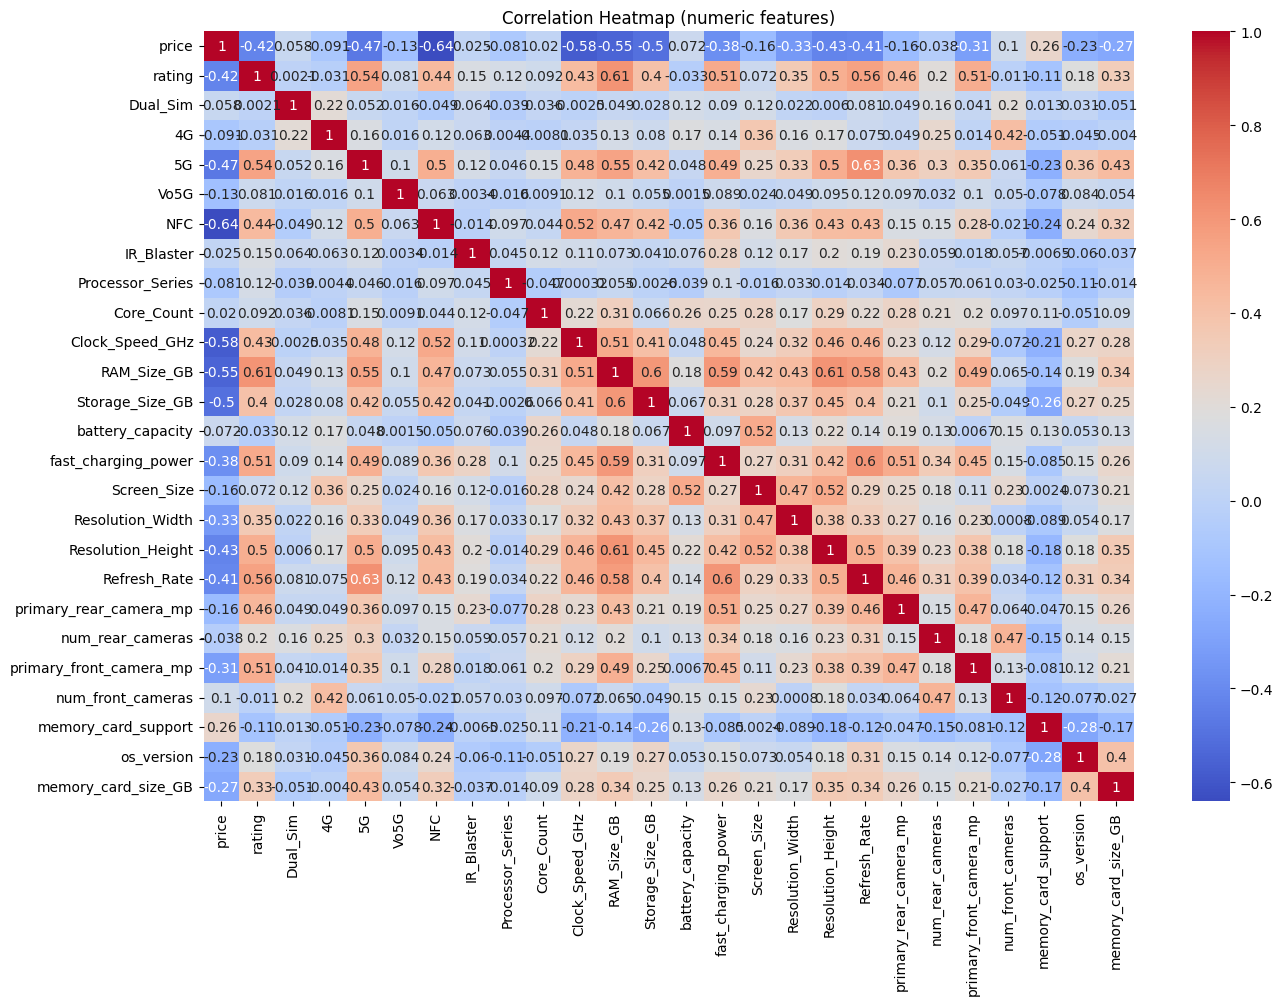

In [27]:

plt.figure(figsize=(15,10))
numeric_corr = df.select_dtypes(include='number').corr()
sns.heatmap(numeric_corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap (numeric features)')
plt.show()
    

In [28]:
outliers_col=['rating','Processor_Series','Core_Count','Clock_Speed_GHz',
              'RAM_Size_GB','Storage_Size_GB','battery_capacity','fast_charging_power',
              'Screen_Size','Resolution_Width','Resolution_Height','Refresh_Rate',
              'primary_rear_camera_mp','primary_front_camera_mp','num_front_cameras','memory_card_size_GB']
outliers_col_clean = [col.strip() for col in outliers_col]
for c in outliers_col_clean:
    df[f"log_{c}"] = np.log1p(df[c])

In [29]:
df['performance_score'] = df['log_Core_Count'] * df['log_Clock_Speed_GHz'] * (df['log_RAM_Size_GB'] / 4)
df['camera_quality_score'] = (df['log_primary_rear_camera_mp'] * 0.7 + df['log_primary_front_camera_mp'] * 0.3)

In [30]:
df.drop(columns=outliers_col_clean, inplace=True)

In [31]:
colms=['Processor_Brand','Performance_Tier','RAM_Tier','Notch_Type','os_name','brand']
for c in colms:
    print(f"{c}: {df[c].unique()}")
   

Processor_Brand: ['Other' 'Bionic' 'Snapdragon' 'Google Tensor' 'Dimensity' 'Exynos'
 'Kirin' 'Helio' 'Unisoc']
Performance_Tier: ['Unknown' 'Flagship' 'High-End' 'Mid-Range' 'Budget']
RAM_Tier: ['Mid-Range' 'Budget' 'High-End' 'Flagship']
Notch_Type: ['No Notch' 'Punch Hole' 'Large Notch' 'Small Notch' 'Dual Punch Hole'
 'Water Drop Notch']
os_name: ['iOS' 'Android' 'HarmonyOS' 'EMUI' 'KAI OS' 'Pragati OS' 'RTOS']
brand: ['Apple' 'Vertu' 'Google' 'Nokia' 'OnePlus' 'Samsung' 'Vivo' 'Poco'
 'Huawei' 'Xiaomi' 'Asus' 'Motorola' 'Motorola Edge' 'Oppo' 'Honor' 'Sony'
 'LG' 'Nubia' 'Realme' 'Tesla' 'iQOO' 'OPPO' 'Tecno' 'POCO' 'Royole'
 'Nothing' 'Lenovo' 'Sharp' 'Doogee' 'Infinix' 'ZTE' 'Leitz' 'TCL' 'iKall'
 'Letv' 'Micromax' 'Lyf' 'Realme Narzo' 'itel' 'Jio' 'LeEco' 'Lava'
 'Gionee' 'Blackview' 'Redmi' 'Oukitel' 'Cola' 'Zanco' 'CAT' 'Eunity'
 'Namotel' 'XTouch' 'Karbonn' 'DIZO' 'Duoqin' 'BlackZone' 'Itel' 'BLU']


In [32]:
replace_dict = { "Poco": "POCO", "Oppo": "OPPO", "itel": "Itel", "Motorola Edge": "Motorola",}
df['brand'] = df['brand'].replace(replace_dict)

In [33]:
df['brand'].value_counts()

brand
Samsung         135
Xiaomi          132
Vivo            111
OPPO             87
Realme           80
Motorola         53
Apple            45
POCO             41
OnePlus          41
Tecno            33
iQOO             32
Infinix          29
Nokia            28
Realme Narzo     17
Huawei           16
Google           14
Honor            13
Itel             13
Sony              9
Asus              7
Nubia             6
Nothing           5
Jio               5
iKall             4
Lava              4
LG                4
Letv              3
Redmi             3
Gionee            3
Micromax          3
Oukitel           3
Lyf               3
Eunity            3
Royole            2
ZTE               2
Doogee            2
Lenovo            2
Vertu             1
Tesla             1
Sharp             1
Leitz             1
TCL               1
LeEco             1
Blackview         1
Zanco             1
Cola              1
CAT               1
Namotel           1
XTouch            1
Karbonn       

In [34]:
min_frquency = 10
brand_counts = df['brand'].value_counts()
brands_to_replace = brand_counts[brand_counts < min_frquency].index
df['brand'] = df['brand'].replace(brands_to_replace, 'Other')

In [35]:
df['Processor_Brand'].value_counts()

Processor_Brand
Snapdragon       411
Helio            202
Dimensity        174
Other             93
Exynos            50
Bionic            42
Unisoc            28
Kirin              7
Google Tensor      3
Name: count, dtype: int64

In [36]:
count= df['Processor_Brand'].value_counts()
processor_brand_replace = count[count < min_frquency].index
df['Processor_Brand'] = df['Processor_Brand'].replace(processor_brand_replace, 'Other')

In [37]:
df['Notch_Type'].value_counts()


Notch_Type
Punch Hole          556
Water Drop Notch    308
No Notch            102
Small Notch          25
Large Notch          13
Dual Punch Hole       6
Name: count, dtype: int64

In [38]:
count_type=df['Notch_Type'].value_counts()
notch_type_replace = count_type[count_type < min_frquency].index
df['Notch_Type'] = df['Notch_Type'].replace(notch_type_replace, 'Other')

In [39]:
df['os_name'].value_counts()

os_name
Android       967
iOS            33
HarmonyOS       4
EMUI            2
RTOS            2
KAI OS          1
Pragati OS      1
Name: count, dtype: int64

In [40]:
count_os=df['os_name'].value_counts()
os_replace = count_os[count_os < min_frquency].index
df['os_name'] = df['os_name'].replace(os_replace, 'Other')

In [41]:
colms=['Processor_Brand','Performance_Tier','RAM_Tier','Notch_Type','os_name','brand']
for c in colms:
    print(f"{c}: {df[c].unique()}")
   

Processor_Brand: ['Other' 'Bionic' 'Snapdragon' 'Dimensity' 'Exynos' 'Helio' 'Unisoc']
Performance_Tier: ['Unknown' 'Flagship' 'High-End' 'Mid-Range' 'Budget']
RAM_Tier: ['Mid-Range' 'Budget' 'High-End' 'Flagship']
Notch_Type: ['No Notch' 'Punch Hole' 'Large Notch' 'Small Notch' 'Other'
 'Water Drop Notch']
os_name: ['iOS' 'Android' 'Other']
brand: ['Apple' 'Other' 'Google' 'Nokia' 'OnePlus' 'Samsung' 'Vivo' 'POCO'
 'Huawei' 'Xiaomi' 'Motorola' 'OPPO' 'Honor' 'Realme' 'iQOO' 'Tecno'
 'Infinix' 'Realme Narzo' 'Itel']


In [42]:
one_hot_cols = ['Processor_Brand', 'Notch_Type', 'os_name']
ohn = OneHotEncoder(drop='first', sparse_output=False)
encoded_cols = ohn.fit_transform(df[one_hot_cols])
encoded_col_names = ohn.get_feature_names_out(one_hot_cols)
encoded_df = pd.DataFrame(encoded_cols, columns=encoded_col_names)
df.reset_index(drop=True, inplace=True)
df = pd.concat([df, encoded_df], axis=1)
df.drop(columns=one_hot_cols, inplace=True)

In [43]:
tiers_order = [
	['Unknown', 'Budget', 'Low-End', 'Mid-Range', 'High-End', 'Flagship'],
	['Unknown', 'Budget', 'Low-End', 'Mid-Range', 'High-End', 'Flagship']
]

oe = OrdinalEncoder(categories=tiers_order)
df[['Performance_Tier', 'RAM_Tier']] = oe.fit_transform(df[['Performance_Tier', 'RAM_Tier']])

In [44]:
te = TargetEncoder(cols=['brand'], min_samples_leaf=20, smoothing=10)
df['brand'] = te.fit_transform(df['brand'], df['price'])

In [45]:
df.head()

,price,Dual_Sim,4G,5G,Vo5G,NFC,IR_Blaster,Performance_Tier,RAM_Tier,num_rear_cameras,memory_card_support,os_version,brand,log_rating,log_Processor_Series,log_Core_Count,log_Clock_Speed_GHz,log_RAM_Size_GB,log_Storage_Size_GB,log_battery_capacity,log_fast_charging_power,log_Screen_Size,log_Resolution_Width,log_Resolution_Height,log_Refresh_Rate,log_primary_rear_camera_mp,log_primary_front_camera_mp,log_num_front_cameras,log_memory_card_size_GB,performance_score,camera_quality_score,Processor_Brand_Dimensity,Processor_Brand_Exynos,Processor_Brand_Helio,Processor_Brand_Other,Processor_Brand_Snapdragon,Processor_Brand_Unisoc,Notch_Type_No Notch,Notch_Type_Other,Notch_Type_Punch Hole,Notch_Type_Small Notch,Notch_Type_Water Drop Notch,os_name_Other,os_name_iOS
0,0,1,1,0,0,1,0,0.0,3.0,2.0,0,12.30,0.095601,4.110874,2.639057,2.197225,1.223775,1.609438,4.174387,8.026497,0.000000,1.960095,6.720220,7.491645,4.110874,2.564949,2.079442,0.693147,6.908755,1.081908,2.419297,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0,1,1,1,0,1,0,0.0,3.0,0.0,1,12.00,0.095601,4.110874,2.772589,1.945910,1.439835,1.945910,4.174387,8.517393,0.000000,2.025513,6.985642,7.783641,4.510860,3.931826,2.833213,0.000000,6.908755,1.363008,3.602242,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0,0,1,0,0,1,0,5.0,1.0,1.0,0,4.42,0.633411,4.143135,6.687109,2.197225,0.916291,1.098612,4.174387,7.730175,0.000000,1.740466,6.985642,7.560601,4.110874,2.639057,0.693147,0.693147,6.908755,0.552958,2.055284,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,1,1,0,0,1,0,0.0,1.0,1.0,1,12.00,0.095601,4.158883,2.639057,1.945910,1.294727,1.386294,4.174387,7.507690,2.944439,1.740466,6.621406,7.196687,4.110874,2.564949,2.079442,0.693147,6.908755,0.873165,2.419297,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,1,1,1,0,1,0,0.0,3.0,2.0,0,12.00,0.565346,4.248495,3.583519,2.197225,1.223775,1.945910,4.859812,8.391857,0.000000,1.960095,6.985642,7.783641,4.510860,1.098612,2.197225,0.693147,6.908755,1.308094,1.428196,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


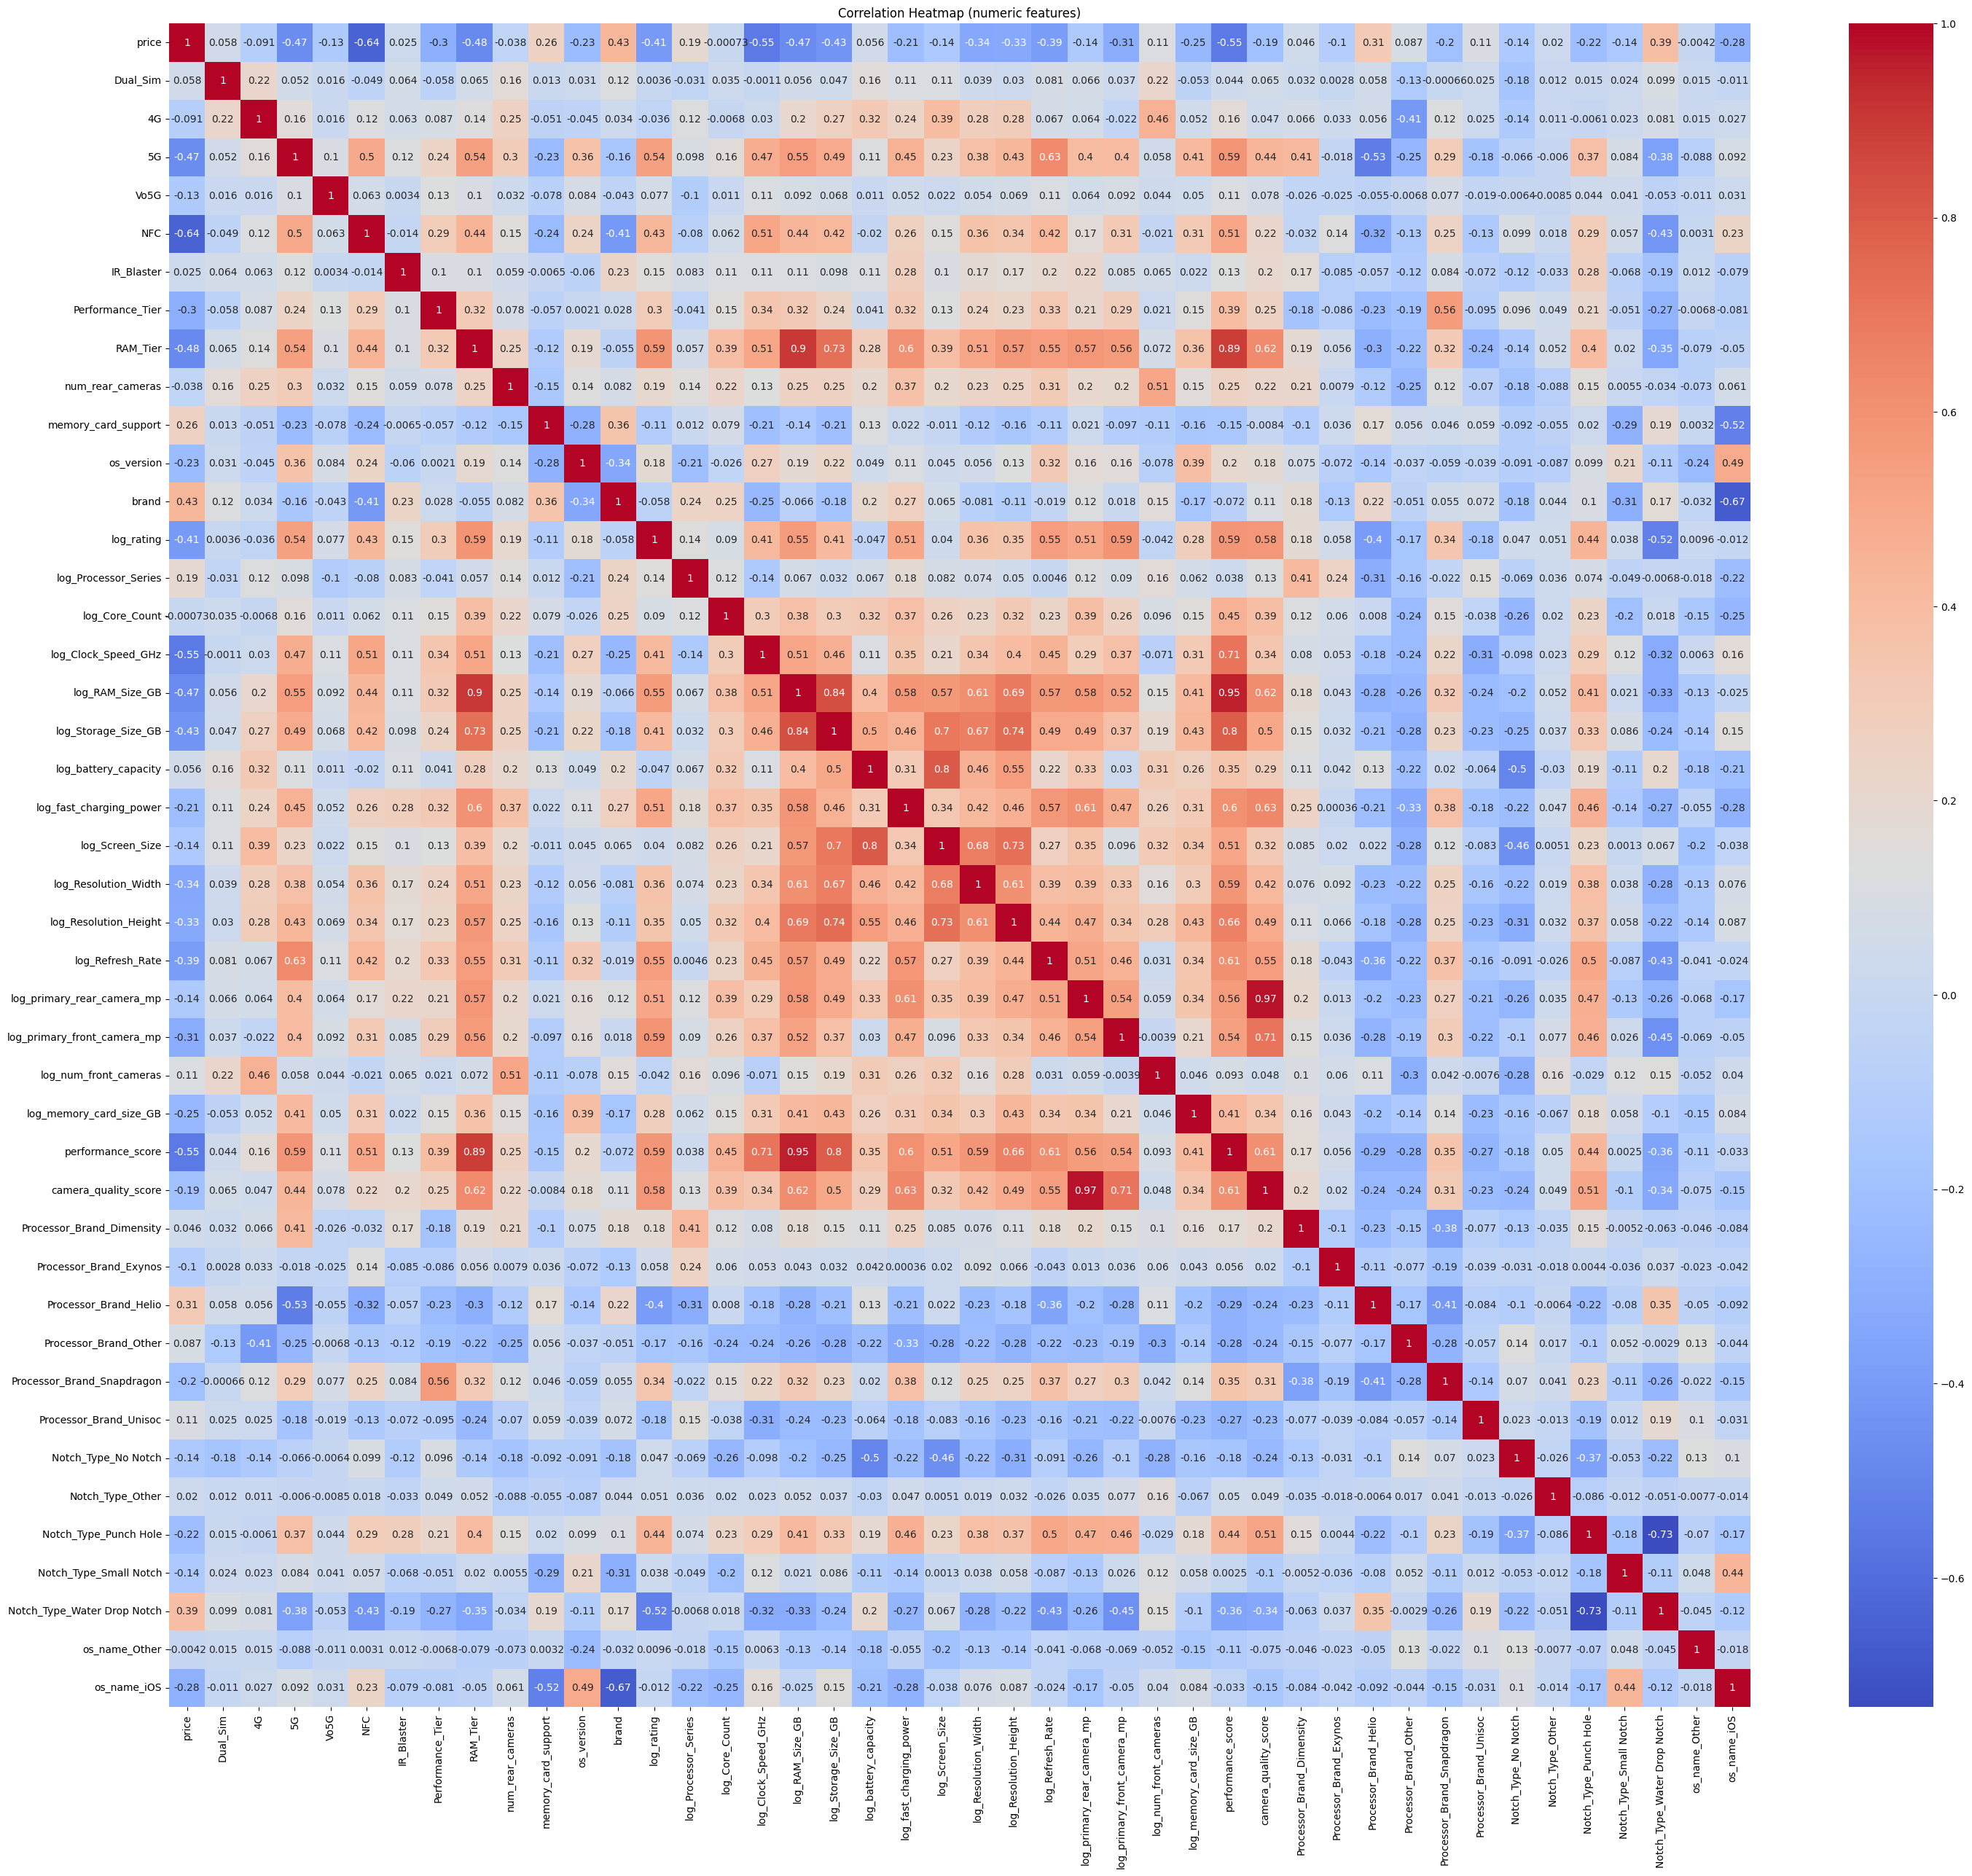

In [46]:
plt.figure(figsize=(35,30))
numeric_corr = df.select_dtypes(include='number').corr()
sns.heatmap(numeric_corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap (numeric features)')
plt.show()

In [47]:
# Separate features and target variable
X = df.drop('price', axis=1)
y = df['price']


log_Processor_Series           0.391095
performance_score              0.333103
log_Resolution_Height          0.235753
log_Clock_Speed_GHz            0.233928
camera_quality_score           0.226778
NFC                            0.209946
log_Resolution_Width           0.198432
log_Storage_Size_GB            0.196430
log_primary_front_camera_mp    0.182036
log_fast_charging_power        0.160201
RAM_Tier                       0.158129
log_rating                     0.153792
log_RAM_Size_GB                0.152679
log_Screen_Size                0.150213
Notch_Type_Water Drop Notch    0.141243
Performance_Tier               0.132201
5G                             0.124118
log_primary_rear_camera_mp     0.113300
log_battery_capacity           0.104897
brand                          0.087412
dtype: float64


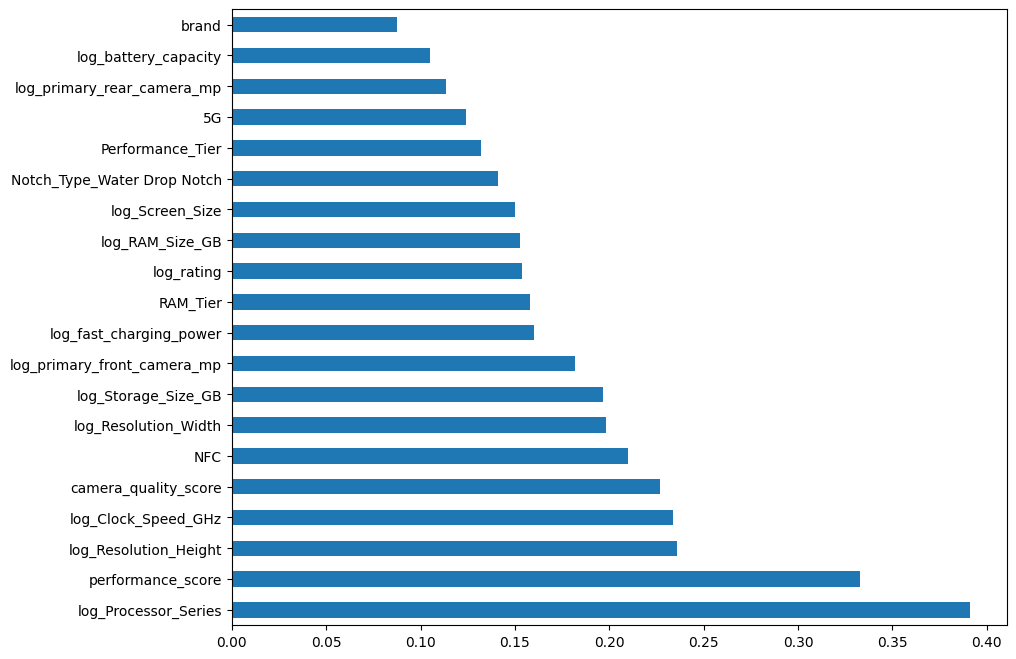

In [48]:
from sklearn.feature_selection import mutual_info_regression
mi = mutual_info_regression(X, y)
mi_series = pd.Series(mi, index=X.columns)
mi_series = mi_series.sort_values(ascending=False)
print(mi_series.head(20))

plt.figure(figsize=(10,8))
mi_series.head(20).plot(kind='barh')
plt.show()


# Modeling

### Models -> 2 

In [49]:
!pip install imbalanced-learn
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, chi2
from imbalanced_learn.over_sampling import SMOT

Defaulting to user installation because normal site-packages is not writeable


ModuleNotFoundError: No module named 'imbalanced_learn'

In [50]:
from sklearn.model_selection import train_test_split
#seperate train and test data from df"
# train_data=df[0:869]
# test_data=df[869:]
# x_train=train_data.drop('price',axis=1)
# y_train=train_data['price']
# x_test=test_data.drop('price',axis=1)
# y_test=test_data['price']
new_df=df[mi_series.head(30).index]    #model performance improved when using top 20 features
x=new_df
y=df["price"]
# x=df.drop(columns="price")
# y=df["price"]
x_train, x_test, y_train, y_test=train_test_split(x,y,random_state=42, test_size=0.2)

In [51]:
#selecting and scaling
#selector=SelectKBest(chi2,k=150)
#x_train=selector.fit_transform(x_train,y_train)
#x_test=selector.transform(x_test)
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [52]:
#using decision treem svm, random forest, xgbosting, knn
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [53]:
from sklearn.model_selection import GridSearchCV
models={
    "decision_tree":DecisionTreeClassifier(), # Changed to Classifier
    "random_forest":RandomForestClassifier(), # Changed to Classifier
    "svm":SVC(probability=True), # Changed to Classifier, probability=True for some metrics if needed
    "xgboost":XGBClassifier(use_label_encoder=False, eval_metric='logloss'), # Changed to Classifier
    "knn":KNeighborsClassifier() # Changed to Classifier
}
#put parameters for each model
parameters = {
    "decision_tree": {
        'criterion': ['gini', 'entropy'], # How the tree decides to split (Math vs Info Theory)
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': ['sqrt', 'log2', None], # VERY IMPORTANT: Restricts features per split to reduce overfitting
        'class_weight': [None, 'balanced'] # Vital if you have unequal classes (e.g., 90% non-expensive, 10% expensive)
    },

    "random_forest": {
        'n_estimators': [100, 200],
        'max_depth': [10, 20, None],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2],
        'max_features': ['sqrt', 'log2'], # Controls diversity of trees
        'bootstrap': [True, False], # Sampling with replacement or not
        'class_weight': [None, 'balanced']
    },

    "svm": {
        'C': [0.1, 1, 10], # Regularization: Small C = simple boundary (underfit), Large C = complex boundary (overfit)
        'gamma': ['scale', 'auto', 0.1, 0.01], # Kernel coefficient: High gamma = strict fit to data points
        'kernel': ['rbf', 'poly'],
        'degree': [2, 3], # Only used if kernel is 'poly'
        'class_weight': [None, 'balanced']
    },

    "xgboost": {
        'n_estimators': [100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7],
        'subsample': [0.7, 0.8, 1.0], # % of rows used per tree. <1.0 prevents overfitting
        'colsample_bytree': [0.7, 0.8, 1.0], # % of columns used per tree. Great for feature selection
        'gamma': [0, 0.1, 0.2], # Minimum loss reduction required to make a split (Regularization)
        'scale_pos_weight': [1] # Change this if you have imbalanced classes (e.g., sum(negative) / sum(positive))
    },

    "knn": {
        'n_neighbors': [3, 5, 7, 11],
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan', 'minkowski'], # How distance is calculated
        'p': [1, 2] # 1=Manhattan, 2=Euclidean (Only for Minkowski)
    }
}
def run_grid_search(models, parameters,x_train, y_train,x_test, y_test):
    results = {}
    for model_name, model in models.items():
        print(f"\nRunning GridSearchCV for {model_name}...")
        # Use 'accuracy' for classification, and make sure models are classifiers
        grid_search = GridSearchCV(model, parameters[model_name], cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
        grid_search.fit(x_train, y_train)
        results[model_name] = grid_search
        print(f"Best parameters for {model_name}: {grid_search.best_params_}")
        y_pred=grid_search.predict(x_test)
        print("confusion matrix")
        print(confusion_matrix(y_test,y_pred))
        print("classification report",classification_report(y_test,y_pred))



run_grid_search(models, parameters, x_train, y_train,x_test, y_test)


Running GridSearchCV for decision_tree...
Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best parameters for decision_tree: {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 2}
confusion matrix
[[ 46   6]
 [ 18 132]]
classification report               precision    recall  f1-score   support

           0       0.72      0.88      0.79        52
           1       0.96      0.88      0.92       150

    accuracy                           0.88       202
   macro avg       0.84      0.88      0.85       202
weighted avg       0.90      0.88      0.88       202


Running GridSearchCV for random_forest...
Fitting 5 folds for each of 192 candidates, totalling 960 fits
Best parameters for random_forest: {'bootstrap': True, 'class_weight': None, 'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
confusion matrix
[[ 48   4]
 [  9 141]]

Decision Tree

classification report
              precision    recall  f1-score   support

           0       0.75      0.90      0.82        52
           1       0.96      0.89      0.93       150

    accuracy                           0.90       202
   macro avg       0.86      0.90      0.87       202
weighted avg       0.91      0.90      0.90       202



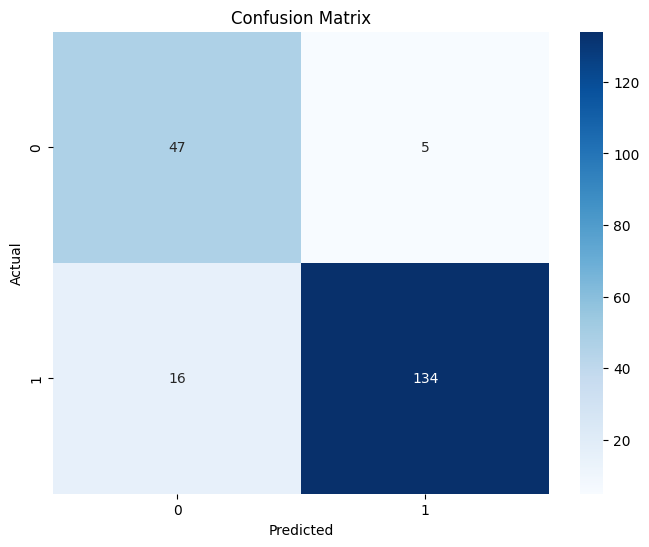

In [54]:
DT=DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=20, max_features=None, min_samples_leaf=2, min_samples_split=2)
DT.fit(x_train,y_train)
y_pred=DT.predict(x_test)
print("classification report")
print(classification_report(y_test,y_pred))
#plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
# import joblib
# joblib.dump(DT, 'smartphone_price_classifier_model.pkl')

SVM

classification report
              precision    recall  f1-score   support

           0       0.78      0.94      0.85        52
           1       0.98      0.91      0.94       150

    accuracy                           0.92       202
   macro avg       0.88      0.92      0.90       202
weighted avg       0.93      0.92      0.92       202



Text(0.5, 1.0, 'Confusion Matrix')

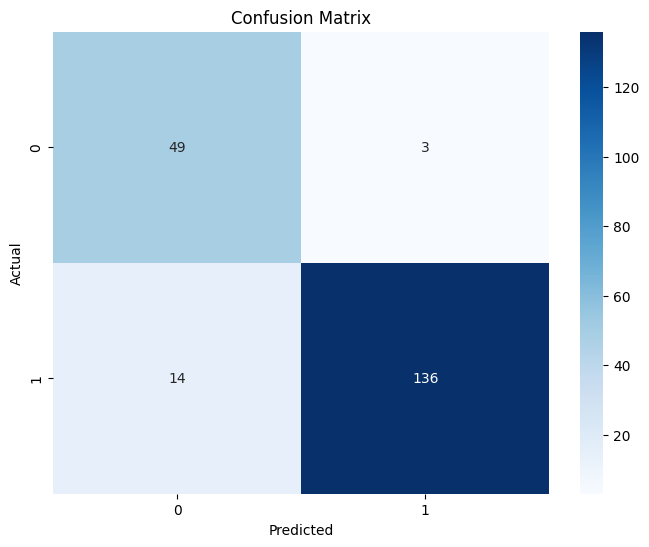

In [55]:
#SVM=SVC(C=1, class_weight='balanced', degree=3, gamma='scale', kernel='poly')   with 20 features
SVM=SVC(C=1, class_weight='balanced', degree=2, gamma='scale', kernel='rbf')   #with 30 features

SVM.fit(x_train,y_train)
y_pred=SVM.predict(x_test)
print("classification report")
print(classification_report(y_test,y_pred))
#plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
# plt.show()
# joblib.dump(SVM, 'smartphone_price_svm_classifier_model.pkl')

### Models -> 2 

In [56]:
# Models code

### Models -> 1

In [57]:
# Model code